# Understanding First Names
## Bradley Warner March 2018


Note: This post is based on a project posted on the [datacamp website.](https://www.datacamp.com) The ideas are from datacamp, I completed the work.

## 1. Introduction to Baby Names Data
<blockquote>
  <p>Mathematics is the art of giving the same name to different things.</p>
    <p>Henri Poincare</p>
</blockquote>
<p>In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. </p>
<p>Let us start by reading the data.</p>

In [1]:
# Import modules
import pandas as pd
import numpy as np

In [2]:
# Read names into a dataframe: bnames
bnames=pd.read_csv("datasets/names.csv.gz")

In [3]:
bnames.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## 2. Exploring Trends in Names
<p>One of the first things we want to do is to understand naming trends. Let us start by determining the top five most popular male and female names for this decade (born 2011 and later). Brianna for female and Brendon for males is my guess.</p>

In [4]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade
bnames_top5=bnames[bnames.year>2010].\
groupby(['sex','name'],as_index=False).births.sum().\
sort_values(by=['sex','births'],ascending=[True,False]).groupby('sex').\
head(5).reset_index(drop=True)
bnames_top5

,sex,name,births
0,F,Emma,121375
1,F,Sophia,117352
2,F,Olivia,111691
3,F,Isabella,103947
4,F,Ava,94507
5,M,Noah,110280
6,M,Mason,105104
7,M,Jacob,104722
8,M,Liam,103250
9,M,William,99144


Now let's look at the 1990s.

In [5]:
bnames_top590=bnames[(bnames.year>1989) & (bnames.year<2000)].\
groupby(['sex','name'],as_index=False).births.sum().\
sort_values(by=['sex','births'],ascending=[True,False]).groupby('sex').\
head(5).reset_index(drop=True)
bnames_top590

,sex,name,births
0,F,Jessica,303079
1,F,Ashley,301798
2,F,Emily,237222
3,F,Sarah,224282
4,F,Samantha,223989
5,M,Michael,462302
6,M,Christopher,360196
7,M,Matthew,351596
8,M,Joshua,329108
9,M,Jacob,298304


Now the 60s when I was born

In [6]:
bnames_top560=bnames[(bnames.year>1959) & (bnames.year<1970)].\
groupby(['sex','name'],as_index=False).births.sum().\
sort_values(by=['sex','births'],ascending=[True,False]).groupby('sex').\
head(5).reset_index(drop=True)
bnames_top560

,sex,name,births
0,F,Lisa,496975
1,F,Mary,355216
2,F,Susan,287665
3,F,Karen,286044
4,F,Kimberly,259090
5,M,Michael,833343
6,M,David,734142
7,M,John,713587
8,M,James,684943
9,M,Robert,650918


## 3. Proportion of Births

While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year. I want to find the percentage of Bradleys born in 1962.

In [7]:
bnames2 = bnames.copy()
bnames2['prop_births']=bnames2.groupby('year')['births'].\
transform(lambda x:x/x.sum())
bnames2.head(10)

,name,sex,births,year,prop_births
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666
5,Margaret,F,1578,1880,0.007832
6,Ida,F,1472,1880,0.007306
7,Alice,F,1414,1880,0.007018
8,Bertha,F,1320,1880,0.006551
9,Sarah,F,1288,1880,0.006393


In [8]:
bnames2[(bnames2.year==1962) & (bnames2.name == "Bradley")].reset_index(drop=True)

,name,sex,births,year,prop_births
0,Bradley,F,9,1962,0.000002
1,Bradley,M,4636,1962,0.001149


In 1962 there were 4636 males born with the name Bradley and registered in the SSA. Let's get them most common names from 1962 and compare with Bradley

In [9]:
bnames2[(bnames2.year==1962) & (bnames2.sex == "M")].\
sort_values(by='prop_births',ascending=False).head(5).reset_index(drop=True)

,name,sex,births,year,prop_births
0,Michael,M,85042,1962,0.021073
1,David,M,81328,1962,0.020153
2,John,M,78441,1962,0.019438
3,James,M,72565,1962,0.017982
4,Robert,M,70206,1962,0.017397


## 4. Popularity of Names

Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names <code>Mary</code>, <code>Melissa</code> and <code>Mackenzie</code>, and inspecting the underlying trends for any interesting patterns!

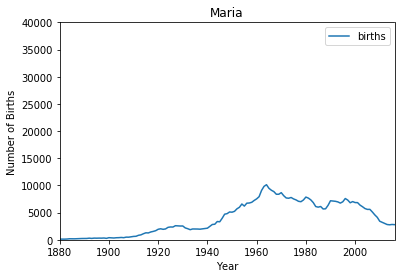

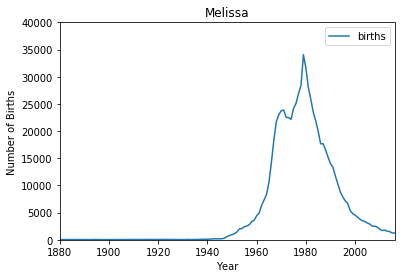

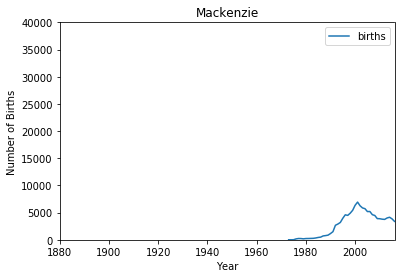

In [10]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
    data=bnames2[(bnames2.name==name)&(bnames2.sex==sex)]
    ax=data.plot(x="year",y="births")
    ax.set_xlim(1880,2016)
    ax.set_ylim(0,40000)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Births")
    ax.set_title(name)
    return ax


# Plot trends for Mary, Melissa, and Mackenzie 
for name in ["Maria","Melissa","Mackenzie"]:
    plot_trends(name,"F")

Now for the males in class.

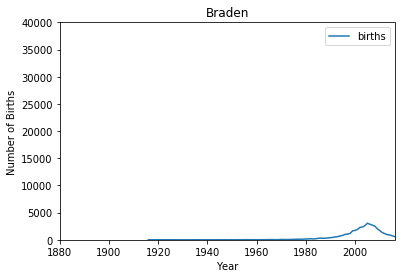

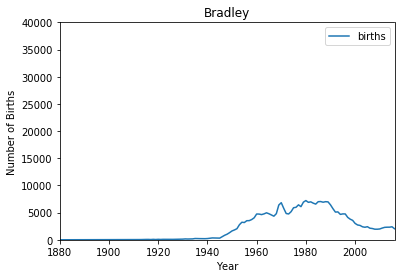

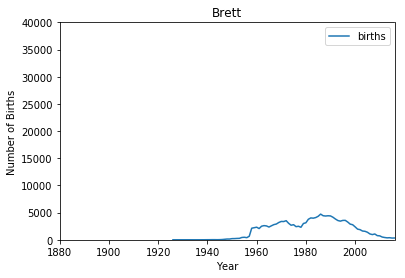

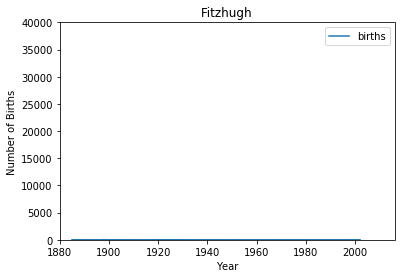

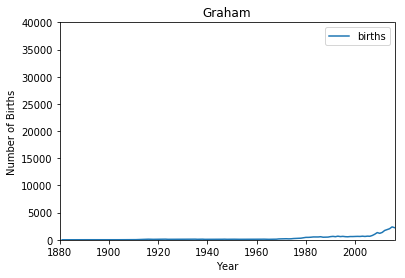

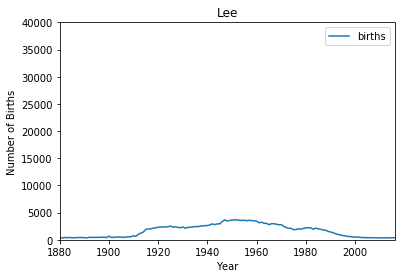

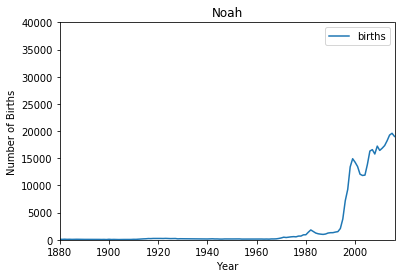

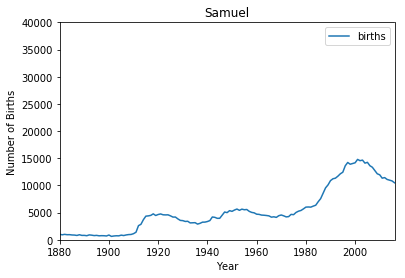

In [11]:
# Plot trends for Braden, Bradley, Brett, Fitzhugh, Graham, Lee, Noah, Samuel
for name in ["Braden", "Bradley", "Brett", "Fitzhugh", "Graham", "Lee", "Noah", "Samuel"]:
    plot_trends(name,"M")

## 5. Trendy vs. Stable Names
<p>Based on the plots we created earlier, we can see that <strong>Maria</strong> is a fairly stable name, while <strong>Mackenzie</strong> is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. </p>
<p>There are many ways to measure trendiness. A simple measure would be to look at the average proportion of births for a name divided by the maximum proportion of births for a name. For example, if the name <code>Joe</code> had the proportions <code>0.1, 0.2, 0.1, 0.1</code>, then the trendiness measure would be <code>(0.1 + 0.2 + 0.1 + 0.1)/(4 * .2)</code> which equals <code>0.625</code>. A name that is stable will have a value of 1.</p>
<p>Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.</p>

In [12]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
all_trends=pd.DataFrame()
all_trends['total']=bnames2.groupby(['sex','name']).births.sum()
all_trends['average']=bnames2.groupby(['sex','name']).prop_births.mean()
all_trends['max']=bnames2.groupby(['sex','name']).prop_births.max()
all_trends['trendiness']=all_trends['average']/all_trends['max']
all_trends=all_trends.reset_index()
top10_trendy_names=all_trends[all_trends.total>=1000].\
sort_values('trendiness',ascending=True).head(10)
top10_trendy_names

,sex,name,total,average,max,trendiness
16099,F,Deneen,3602,0.000019,0.000413,0.045695
41122,F,Marquita,11010,0.000034,0.000734,0.046371
30968,F,Katina,11233,0.000042,0.000873,0.047963
43174,F,Mila,27274,0.000067,0.001320,0.050632
69450,M,Atlas,3373,0.000011,0.000216,0.052115
76160,M,Dewey,34119,0.000158,0.002923,0.054191
71002,M,Brantley,19365,0.000050,0.000905,0.055609
90506,M,Lincoln,48194,0.000110,0.001945,0.056518
79565,M,Garfield,5547,0.000044,0.000763,0.057132
533,F,Adaline,6478,0.000030,0.000515,0.058780


In [13]:
all_trends[(all_trends.name=="Melissa") & (all_trends.sex=="F")]

,sex,name,total,average,max,trendiness
42374,F,Melissa,751990,0.001611,0.010234,0.157434


In [14]:
Math300S=all_trends[(all_trends.name=="Melissa") & (all_trends.sex=="F")]
for name in ["Braden", "Bradley", "Brett", "Fitzhugh", "Graham", "Lee", "Noah", "Samuel"]:
    Math300S=pd.concat([Math300S,all_trends[(all_trends.name==name) & (all_trends.sex=="M")]])

In [15]:
Math300S.sort_values('trendiness',ascending=True)

,sex,name,total,average,max,trendiness
79154,M,Fitzhugh,380,0.000009,0.000073,0.119277
80239,M,Graham,39800,0.000092,0.000645,0.142002
94702,M,Noah,356705,0.000759,0.005319,0.142704
42374,F,Melissa,751990,0.001611,0.010234,0.157434
70856,M,Braden,43516,0.000145,0.000793,0.182700
70865,M,Bradley,302492,0.000649,0.002095,0.309823
71195,M,Brett,157067,0.000514,0.001329,0.386613
99099,M,Samuel,739522,0.002228,0.005082,0.438327
90061,M,Lee,230413,0.000861,0.001927,0.446784


## 6. Bring in Mortality Data
<p>So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the <a href="https://www.ssa.gov/">SSA</a> provides detailed <a href="https://www.ssa.gov/oact/STATS/table4c6.html">actuarial life tables</a> by birth cohorts.</p>
<table>
<thead>
<tr>
<th style="text-align:right;">year</th>
<th style="text-align:right;">age</th>
<th style="text-align:right;">qx</th>
<th style="text-align:right;">lx</th>
<th style="text-align:right;">dx</th>
<th style="text-align:right;">Lx</th>
<th style="text-align:right;">Tx</th>
<th style="text-align:right;">ex</th>
<th style="text-align:left;">sex</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">39</td>
<td style="text-align:right;">0.00283</td>
<td style="text-align:right;">78275</td>
<td style="text-align:right;">222</td>
<td style="text-align:right;">78164</td>
<td style="text-align:right;">3129636</td>
<td style="text-align:right;">39.98</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">40</td>
<td style="text-align:right;">0.00297</td>
<td style="text-align:right;">78053</td>
<td style="text-align:right;">232</td>
<td style="text-align:right;">77937</td>
<td style="text-align:right;">3051472</td>
<td style="text-align:right;">39.09</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">41</td>
<td style="text-align:right;">0.00318</td>
<td style="text-align:right;">77821</td>
<td style="text-align:right;">248</td>
<td style="text-align:right;">77697</td>
<td style="text-align:right;">2973535</td>
<td style="text-align:right;">38.21</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">42</td>
<td style="text-align:right;">0.00332</td>
<td style="text-align:right;">77573</td>
<td style="text-align:right;">257</td>
<td style="text-align:right;">77444</td>
<td style="text-align:right;">2895838</td>
<td style="text-align:right;">37.33</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">43</td>
<td style="text-align:right;">0.00346</td>
<td style="text-align:right;">77316</td>
<td style="text-align:right;">268</td>
<td style="text-align:right;">77182</td>
<td style="text-align:right;">2818394</td>
<td style="text-align:right;">36.45</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">44</td>
<td style="text-align:right;">0.00351</td>
<td style="text-align:right;">77048</td>
<td style="text-align:right;">270</td>
<td style="text-align:right;">76913</td>
<td style="text-align:right;">2741212</td>
<td style="text-align:right;">35.58</td>
<td style="text-align:left;">F</td>
</tr>
</tbody>
</table>
<p>You can read the <a href="https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html">documentation for the lifetables</a> to understand what the different columns mean. The key column of interest to us is <code>lx</code>, which provides the number of people born in a <code>year</code> who live upto a given <code>age</code>. The probability of being alive can be derived as <code>lx</code> by 100,000. </p>
<p>Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" </p>
<p>Let us use this data and plot it to get a sense of the mortality distribution!</p>

In [16]:
# Read lifetables from datasets/lifetables.csv
lifetables=pd.read_csv('datasets/lifetables.csv')
lifetables.head()

,year,age,qx,lx,dx,Lx,Tx,ex,sex
0,1900,0,0.14596,100000.0,"14,596","90,026","5,151,511",51.52,M
1,1900,1,0.03282,85404.0,"2,803","84,003","5,061,484",59.26,M
2,1900,2,0.01634,82601.0,"1,350","81,926","4,977,482",60.26,M
3,1900,3,0.01052,81251.0,855,"80,824","4,895,556",60.25,M
4,1900,4,0.00875,80397.0,703,"80,045","4,814,732",59.89,M


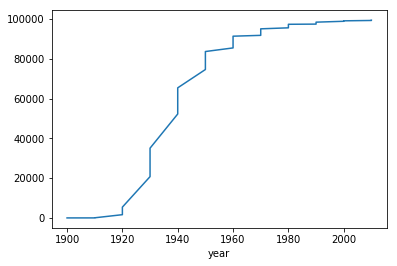

In [17]:
# Extract subset relevant to those alive in 2016
lifetables_2016=lifetables[(lifetables.year+lifetables.age)==2016]
lifetables_2016.head()
# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x='year',y='lx',legend=False)

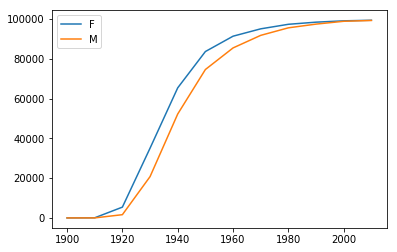

In [18]:
for sex in ["F","M"]:
    temp=lifetables_2016[lifetables_2016.sex==sex]
    plt.plot(temp.year,temp.lx)
plt.legend("FM",loc='upper left')

## 7. Smoothen the Curve!
<p>We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of <code>lx</code>, between the years <code>1900</code> and <code>2016</code>.</p>

In [19]:
# Create smoothened lifetable_2016_s by interpolating values of lx
lifetables_2016_s_temp=lifetables_2016[(lifetables_2016.year>=1900)&(lifetables_2016.year<=2016)][['year','lx','sex']]
lifetables_2016_s_temp.reset_index().head(20)

,index,year,lx,sex
0,116,1900,0.0,M
1,236,1900,0.0,F
2,346,1910,7.0,M
3,466,1910,61.0,F
4,576,1920,1625.0,M
5,696,1920,5428.0,F
6,806,1930,20766.0,M
7,926,1930,35078.0,F
8,1036,1940,52262.0,M
9,1156,1940,65417.0,F


In [20]:
year=np.arange(1900,2016)
year
ltF=lifetables_2016_s_temp[lifetables_2016_s_temp.sex=='F'][['year','lx']].\
set_index('year').reindex(year).interpolate().reset_index()
ltF['sex']='F'
ltM=lifetables_2016_s_temp[lifetables_2016_s_temp.sex=='M'][['year','lx']].\
set_index('year').reindex(year).interpolate().reset_index()
ltM['sex']='M'
lifetable_2016_s=ltF.append(ltM,ignore_index=True)
lifetable_2016_s.head()

,year,lx,sex
0,1900,0.0,F
1,1901,6.1,F
2,1902,12.2,F
3,1903,18.3,F
4,1904,24.4,F


## 8. Distribution of People Alive by Name
<p>Now that we have all the required data, we need a few helper functions to help us with our analysis. </p>
<p>The first function we will write is <code>get_data</code>,which takes <code>name</code> and <code>sex</code> as inputs and returns a data frame with the distribution of number of births and number of people alive by year.</p>
<p>The second function is <code>plot_name</code> which accepts the same arguments as <code>get_data</code>, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.</p>
<p>Using these functions, we will plot the distribution of births for boys named <strong>Joseph</strong> and girls named <strong>Brittany</strong>.</p>

In [21]:
def get_data(name, sex):
    #Get subset of data
    temp=bnames[((bnames['name']==name)&(bnames['sex']==sex))]
    #Need an inner join
    result=temp.merge(lifetable_2016_s,on=['year','sex'])
    result['n_alive']=result['births']*result['lx']/100000
    return result
    

def plot_data(name, sex):
    # Need data
    temp = get_data(name,sex)
    # Generate line plot
    ax=temp.plot(x='year',y='births',kind='line',color='black')
    ax.set_title('Distribution of people for the name: '+name)
    temp.plot(x='year',y='n_alive',ax=ax,kind='area')
    ax.set_xlim(1900,2016)
    ax.set_ylim(0,35000)
    return ax

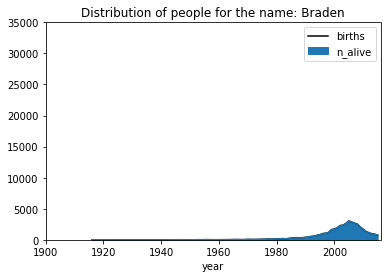

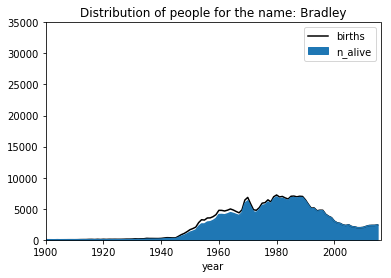

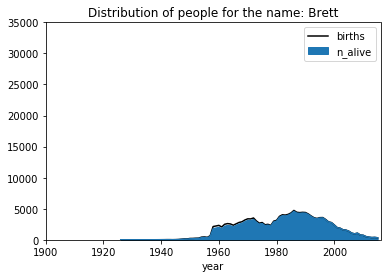

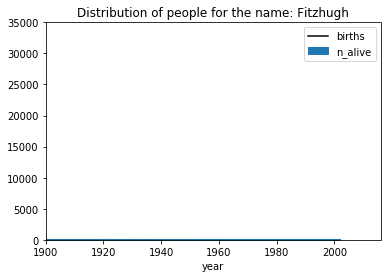

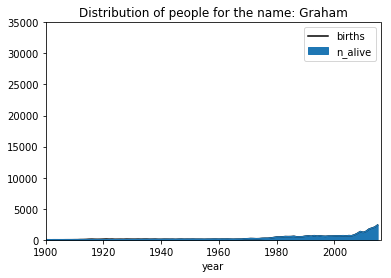

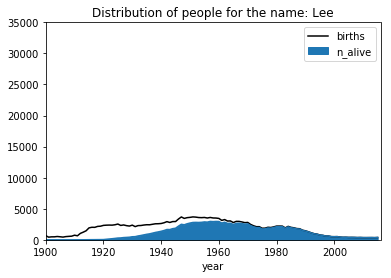

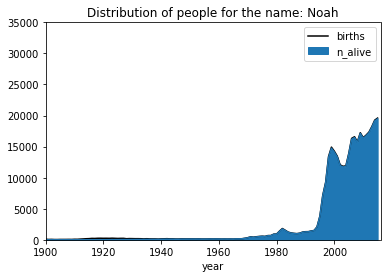

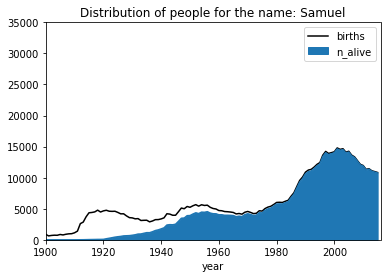

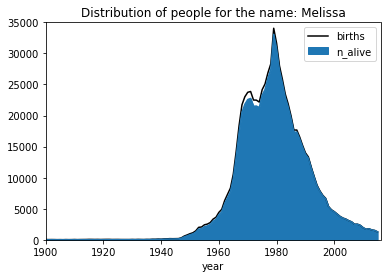

In [22]:
# Plot the distribution of births and number alive for our names
for name in ["Braden", "Bradley", "Brett", "Fitzhugh", "Graham", "Lee", "Noah", "Samuel"]:
    plot_data(name,"M")
plot_data("Melissa","F")

## 9. Estimate Age
<p>In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named <strong>Gertrude</strong>. Any guesses on how old a person with this name is? How about a male named <strong>Ralph</strong>?</p>

In [23]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
def estimate_age(name, sex):
    #Setup dictionary
    result={}
    # Get data
    temp=get_data(name,sex)
    # Probability of being alive
    result['p_alive']=temp.n_alive.sum()/temp.births.sum()
    result['name']=name
    result['sex']=sex
    # Now age quantiles, we must weight by the n_alive at any year
    # This was the code, but let's make it iterable
    #result['q50']=2016-round(quantile(temp.year,temp.n_alive,.5),0)
    #When I ran with q25 with .25 I got the reverse since I am subtracting
    my_list=[('q25',.75),('q50',.5),('q75',.25)]
    for label, quant in my_list:
        result[label]=2016-round(quantile(temp.year,temp.n_alive,quant),0)
    return pd.Series(result)

In [24]:
# Estimate the age of Gertrude
print(estimate_age('Gertrude',"F"))
print(estimate_age('Ralph','M'))

name       Gertrude
p_alive    0.187256
q25              69
q50              80
q75              88
sex               F
dtype: object
name          Ralph
p_alive    0.447255
q25              52
q50              63
q75              73
sex               M
dtype: object


In [25]:
# Our Class
for name in ["Braden", "Bradley", "Brett", "Fitzhugh", "Graham", "Lee", "Noah", "Samuel"]:
    print(estimate_age(name,"M"))
print(estimate_age("Melissa","F"))

name         Braden
p_alive    0.984694
q25               8
q50              12
q75              17
sex               M
dtype: object
name        Bradley
p_alive    0.922146
q25              24
q50              35
q75              47
sex               M
dtype: object
name          Brett
p_alive    0.944521
q25              23
q50              32
q75              44
sex               M
dtype: object
name       Fitzhugh
p_alive    0.255893
q25              62
q50              70
q75              83
sex               M
dtype: object
name         Graham
p_alive    0.900693
q25               5
q50              15
q75              29
sex               M
dtype: object
name            Lee
p_alive    0.631165
q25              37
q50              53
q75              65
sex               M
dtype: object
name           Noah
p_alive    0.969476
q25               5
q50              10
q75              16
sex               M
dtype: object
name         Samuel
p_alive    0.797848
q25              12
q5